In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

c:\users\my dell\pycharmprojects\handsonml\venv\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

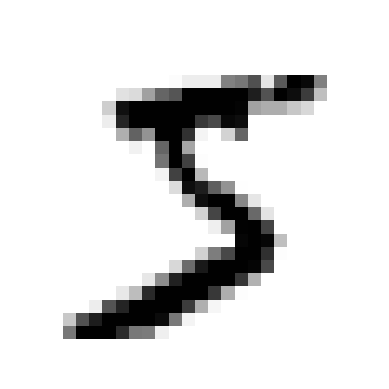

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
y[0]

'5'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")  

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3)

for train_index, test_index in skfold.split(X_train, y_train_5) :
    clone_clf = clone(sgd_clf)
    X_folds = X_train[train_index]
    y_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone_clf.fit(X_folds, y_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [23]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [24]:
threshold = 0
y_somw_digit_pred = (y_score > threshold)
y_somw_digit_pred

array([ True])

In [25]:
threshold = 3000
y_somw_digit_pred = (y_score > threshold)
y_somw_digit_pred

array([False])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

In [28]:
import numpy as np
(np.abs(thresholds-threshold)).argmin()

56978

In [29]:
print(precisions[56978], recalls[56978])

0.8911317008603574 0.4967718133185759


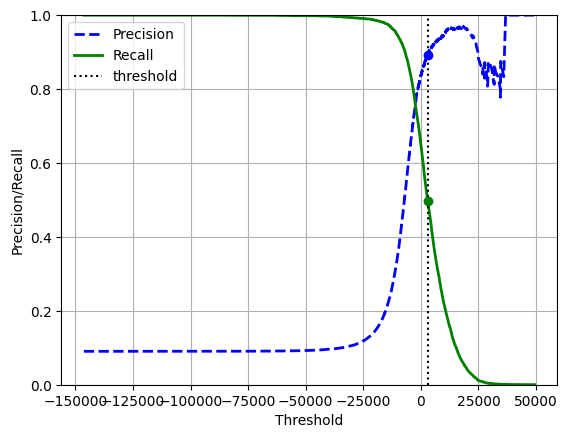

In [30]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.plot(threshold, precisions[56978], 'bo')
plt.plot(threshold, recalls[56978], 'go')
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.ylim([0, 1.0])
plt.show()

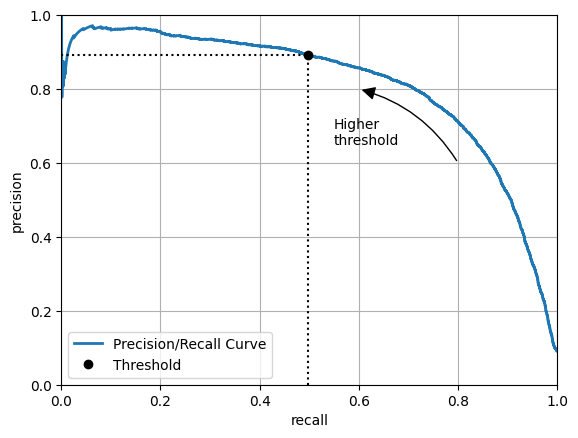

In [31]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")
plt.plot(recalls[56978], precisions[56978], 'ko', label="Threshold")
plt.hlines(precisions[56978], 0, recalls[56978], "k", "dotted")
plt.vlines(recalls[56978], 0, precisions[56978], "k", "dotted")
plt.annotate("",
            xy=(0.8, 0.6), xycoords='data',
            xytext=(0.6, 0.8), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(facecolor='black',arrowstyle="<|-",
                            connectionstyle="arc3,rad=-0.2"))
plt.text(0.55,0.65, "Higher\nthreshold")
plt.grid(True)
plt.xlabel("recall")
plt.ylabel("precision")
plt.ylim([0, 1.0])
plt.xlim([0, 1.0])
plt.legend(loc="lower left")
plt.show()

In [32]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [33]:
y_train_90_pred = (y_scores >= threshold_for_90_precision)

In [34]:
precision_score(y_train_5, y_train_90_pred)

0.9000345901072293

In [35]:
recall_at_90_precision = recall_score(y_train_5, y_train_90_pred)
recall_at_90_precision

0.4799852425751706

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [37]:
idx_for_90_threshold = (thresholds <= threshold_for_90_precision).argmax()
fpr_90, tpr_90 = fpr[idx_for_90_threshold], tpr[idx_for_90_threshold]

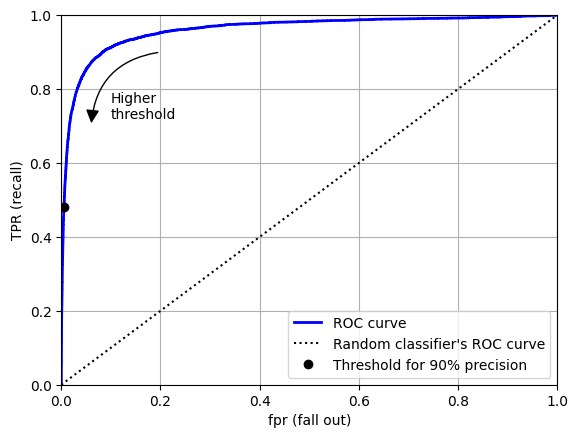

In [38]:
plt.plot(fpr, tpr, "b-", label="ROC curve", linewidth=2)
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.grid(True)
plt.legend(loc="lower right")
plt.xlabel("fpr (fall out)")
plt.ylabel("TPR (recall)")
plt.annotate("", xy=(0.2, 0.9), xytext=(0.06 , 0.7), size=20, va="center", ha="center",
            arrowprops=dict(facecolor='black',arrowstyle="<|-",
                            connectionstyle="arc3,rad=-0.4"))
plt.text(0.1, 0.72, "Higher\nthreshold")
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [41]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [42]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [43]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

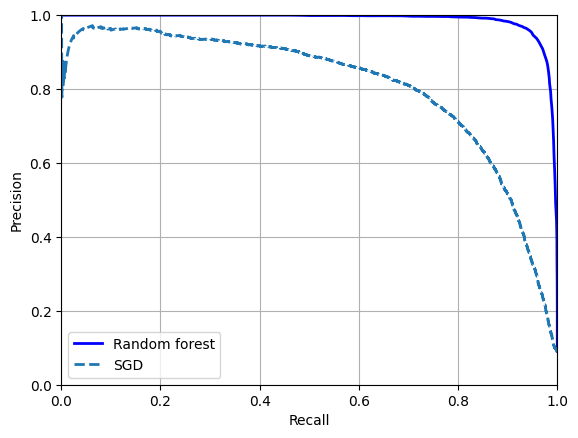

In [44]:
plt.plot(recalls_forest, precisions_forest, "b-", label="Random forest", linewidth=2)
plt.plot(recalls, precisions, "--", label="SGD", linewidth=2)
plt.grid(True)
plt.legend(loc="lower left")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.show()

In [45]:
f1_score(y_train_5, y_scores_forest >= 0.50)

0.9274509803921569

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [47]:
precision_score(y_train_5, y_scores_forest >= 0.50)

0.9897468089558485

In [48]:
recall_score(y_train_5, y_scores_forest >= 0.50)

0.8725327430363402

In [49]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [50]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [51]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [52]:
svm_clf.classes_[some_digit_score.argmax()]

'5'

In [53]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [54]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [55]:
len(ovr_clf.estimators_)

10

In [56]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [57]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [58]:
cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy", cv=3)

array([0.87365, 0.85835, 0.8689 ])

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

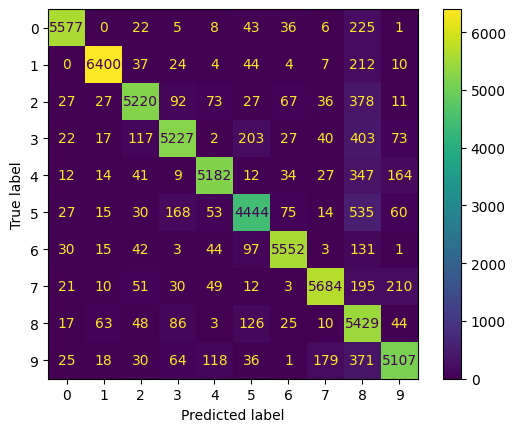

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

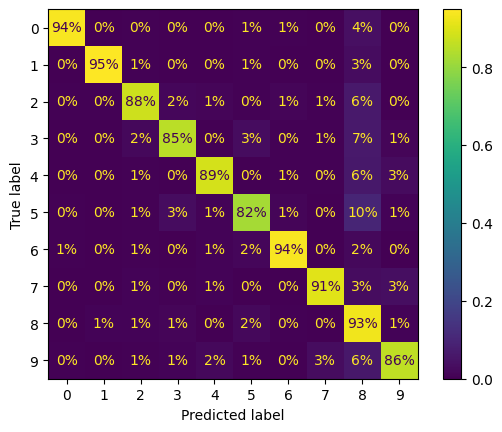

In [61]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format=".0%")
plt.show()

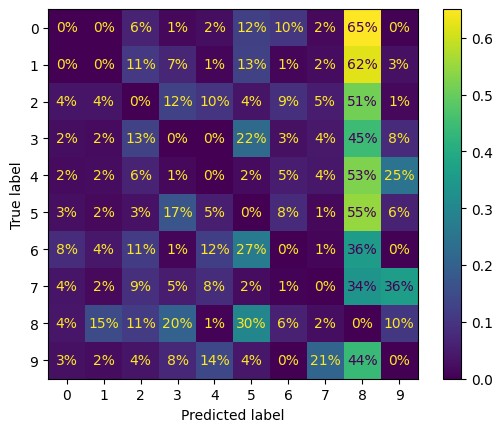

In [62]:
sample_weight = (y_train_pred != y_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize='true', values_format=".0%")
plt.show()

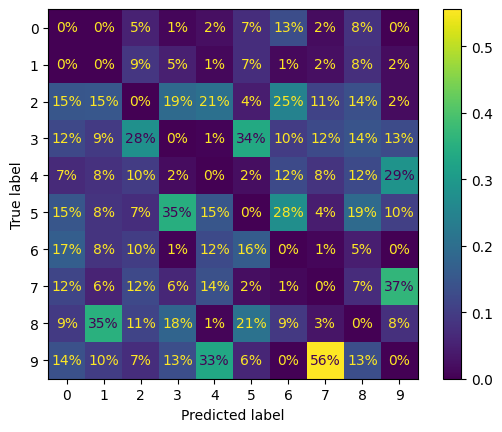

In [63]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")

In [64]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [84]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = "binary", **options)
    plt.axis("off")

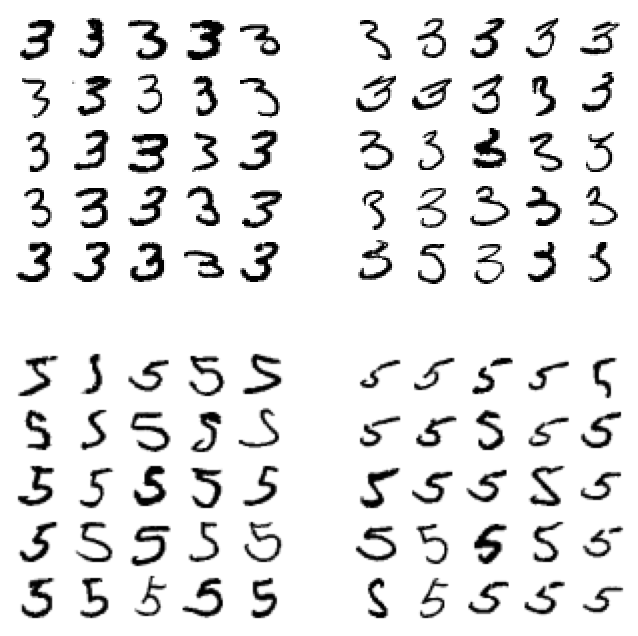

In [85]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [94]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 != 0)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn = KNeighborsClassifier()
knn.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [95]:
knn.predict([some_digit])

array([[False,  True]])

In [100]:
y_train_knn_pred = cross_val_predict(knn, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [101]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [102]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [104]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

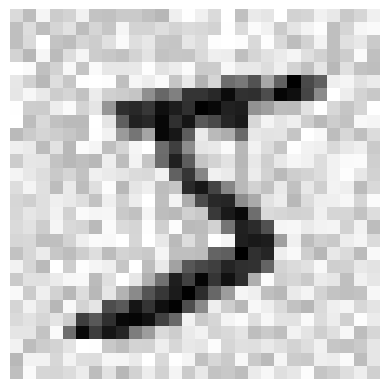

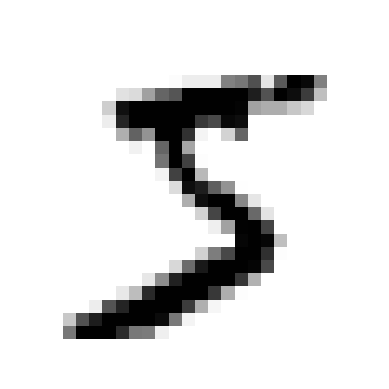

In [110]:
plot_digit(X_train_mod[0])
plt.show()
plot_digit(X_train[0])

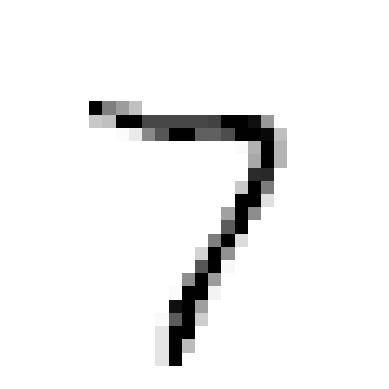

In [112]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_image = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_image)